# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Fadhal Pandya Faiz
- **Email:** afadhalpandya@gmail.com
- **ID Dicoding:** fadhal_faiz

## Menentukan Pertanyaan Bisnis

- Apakah working day memiliki hari yang banyak registered?
- Hubungan antara temperatur, kelembaban, dan kecepatan angin terhadap registred dalam satu tahun.

## Import Semua Packages/Library yang Digunakan

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [114]:
day_df = pd.read_csv("https://raw.githubusercontent.com/fadhalfaiz/bikesharing/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [115]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [116]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [117]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Cleaning Data

In [118]:
day_df.season.replace(1, "springer", inplace=True)

In [119]:
day_df.season.replace(2, "summer", inplace=True)

In [120]:
day_df.season.replace(3, "fall", inplace=True)

In [121]:
day_df.season.replace(4, "winter", inplace=True)

In [122]:
day_df["atemp"] = day_df["atemp"] * 41

In [123]:
day_df["temp"] = day_df["temp"] * 50

In [124]:
day_df["hum"] = day_df["hum"] * 100

In [125]:
day_df["windspeed"] = day_df["windspeed"] * 67

In [126]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [127]:
day_df.workingday.replace(1, "workingday", inplace=True)

In [128]:
day_df.workingday.replace(0, "holiday", inplace=True)

In [129]:
day_df.mnth.replace(1, "January", inplace=True)

In [130]:
day_df.mnth.replace(2, "February", inplace=True)

In [131]:
day_df.mnth.replace(3, "March", inplace=True)

In [132]:
day_df.mnth.replace(4, "April", inplace=True)

In [133]:
day_df.mnth.replace(5, "May", inplace=True)

In [134]:
day_df.mnth.replace(6, "June", inplace=True)

In [135]:
day_df.mnth.replace(7, "July", inplace=True)

In [136]:
day_df.mnth.replace(8, "August", inplace=True)

In [137]:
day_df.mnth.replace(9, "September", inplace=True)

In [138]:
day_df.mnth.replace(10, "October", inplace=True)

In [139]:
day_df.mnth.replace(11, "November", inplace=True)

In [140]:
day_df.mnth.replace(12, "Desember", inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [141]:
day_df.groupby(by=["season", "mnth"]).agg({
    "registered": "sum",
})

registered
season   mnth                 
fall     August         279155
         July           266791
         June            91627
         September      197465
springer Desember        36535
         February       136389
         January        122891
         March          114911
summer   April          208292
         June           180809
         March           69565
         May            256401
winter   Desember       152808
         November       218228
         October        262592
         September       78203

In [142]:
day_df.groupby(by="workingday").registered.sum()

workingday
holiday        683537
workingday    1989125
Name: registered, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-145-9d2d9c3195bb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


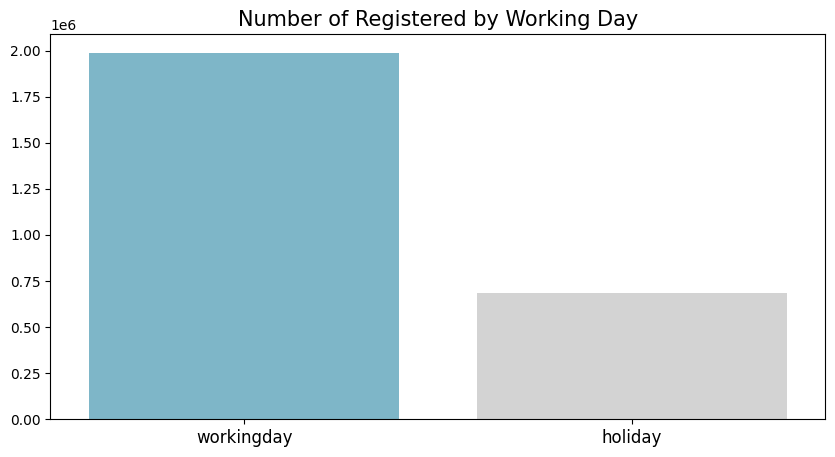

In [145]:
byseason_df = day_df.groupby(by="workingday").registered.sum().reset_index()

colors = ["#72BCD4", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="registered",
    x="workingday",
    data=byseason_df.sort_values(by="registered", ascending=False),
    palette=colors
)
plt.title("Number of Registered by Working Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

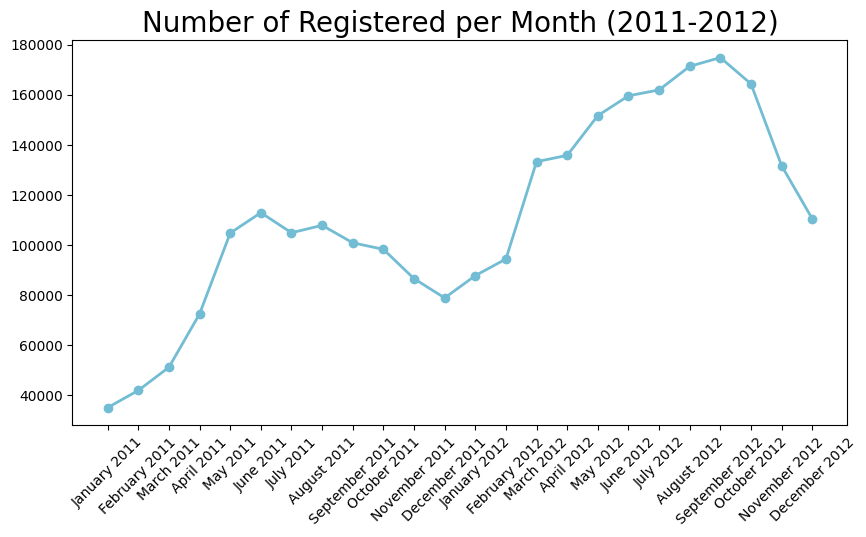

In [146]:
monthly_registered_df = day_df.resample(rule='M', on='dteday').agg({
    "registered": "sum"
})
monthly_registered_df.index = monthly_registered_df.index.strftime('%B %Y') #mengubah format order date menjadi nama bulan

monthly_registered_df = monthly_registered_df.reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_registered_df["dteday"], monthly_registered_df["registered"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Registered per Month (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

## Conclusion

- Jumlah registrasi terbanyak pada saat hari kerja
- Peningkatan registrasi terjadipada musim panas (summer)